In [ ]:
pip install scikit-learn

In [17]:
import os
import shutil
from sklearn.model_selection import train_test_split

train_dir = "../bisindo/images/train"
test_dir = "../bisindo/images/test"

os.makedirs(test_dir, exist_ok=True)

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    # pastikan ini folder
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)

    # split 15% per kelas
    train_imgs, test_imgs = train_test_split(
        images,
        test_size=0.15,
        random_state=42
    )

    # buat folder kelas di test
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # pindahkan gambar test
    for img in test_imgs:
        shutil.move(
            os.path.join(class_path, img),
            os.path.join(test_dir, class_name, img)
        )

In [12]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 4.2 MB/s eta 0:01:20
   ---------------------------------------- 1.3/331.9 MB 3.7 MB/s eta 0:01:29
   ---------------------------------------- 2.4/331.9 MB 4.2 MB/s eta 0:01:19
   ---------------------------------------- 3.1/331.9 MB 4.1 MB/s eta 0:0

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    "../bisindo/images/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = datagen.flow_from_directory(
    "../bisindo/images/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen = datagen.flow_from_directory(
    "../bisindo/images/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


c:\Users\Acer\anaconda3\envs\pytorch_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Found 7782 images belonging to 26 classes.
Found 2301 images belonging to 26 classes.
Found 1387 images belonging to 26 classes.


In [2]:
num_classes = train_gen.num_classes  # harus 26
class_names = list(train_gen.class_indices.keys())
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [3]:
import json

class_indices = train_gen.class_indices
print(class_indices)

with open("../modelling/label_cnn.json", "w") as f:
    json.dump(class_indices, f)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D


cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
])

# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(
#     monitor='val_loss',
#     patience=3,
#     restore_best_weights=True
# )

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\Acer\anaconda3\envs\pytorch_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

Epoch 1/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 879s 4s/step - accuracy: 0.5189 - loss: 1.8419 - val_accuracy: 0.7662 - val_loss: 0.8419
Epoch 2/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 809s 3s/step - accuracy: 0.8008 - loss: 0.7209 - val_accuracy: 0.8101 - val_loss: 0.6675
Epoch 3/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 809s 3s/step - accuracy: 0.8820 - loss: 0.3974 - val_accuracy: 0.8370 - val_loss: 0.5967
Epoch 4/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 807s 3s/step - accuracy: 0.9347 - loss: 0.2221 - val_accuracy: 0.8396 - val_loss: 0.6390
Epoch 5/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 802s 3s/step - accuracy: 0.9564 - loss: 0.1435 - val_accuracy: 0.8383 - val_loss: 0.6857
Epoch 6/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 854s 4s/step - accuracy: 0.9640 - loss: 0.1236 - val_accuracy: 0.8418 - val_loss: 0.6994
Epoch 7/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 993s 4s/step - accuracy: 0.9744 - loss: 0.0938 - val_accuracy: 0.8401 - val_loss: 0.7817
Epoch 8/15
244/244 ━━━━━━━━━━━━━━━━━━━━ 1049s 4s/step - accuracy: 0.9760 - loss: 0.0725 - val_acc

In [6]:
import numpy as np

# Prediksi probabilitas
y_pred_prob = cnn_model.predict(test_gen)

# Ambil kelas prediksi (argmax)
y_pred = np.argmax(y_pred_prob, axis=1)

# Label asli
y_true = test_gen.classes


44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step


In [9]:
from sklearn.metrics import classification_report

class_names = list(test_gen.class_indices.keys())

print("=== Classification Report CNN ===")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


=== Classification Report CNN ===
              precision    recall  f1-score   support

           A       0.76      0.91      0.83        53
           B       0.87      0.89      0.88        53
           C       0.91      0.81      0.86        52
           D       0.77      0.87      0.81        53
           E       0.98      0.85      0.91        53
           F       0.92      0.87      0.90        54
           G       0.89      0.91      0.90        54
           H       0.88      0.83      0.85        53
           I       0.70      0.80      0.75        54
           J       0.87      0.83      0.85        54
           K       0.88      0.87      0.88        53
           L       0.74      0.85      0.79        54
           M       0.85      0.74      0.79        54
           N       0.70      0.89      0.78        53
           O       0.92      0.91      0.92        54
           P       0.76      0.81      0.79        54
           Q       0.92      0.85      0.88    

In [9]:
!pip install seaborn
!pip install matplotli

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.0 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 1.1 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.1 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.1 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.1 MB 993.4 kB/s eta 0:00:06
   -------------- ------

ERROR: Could not find a version that satisfies the requirement matplotli (from versions: none)
ERROR: No matching distribution found for matplotli


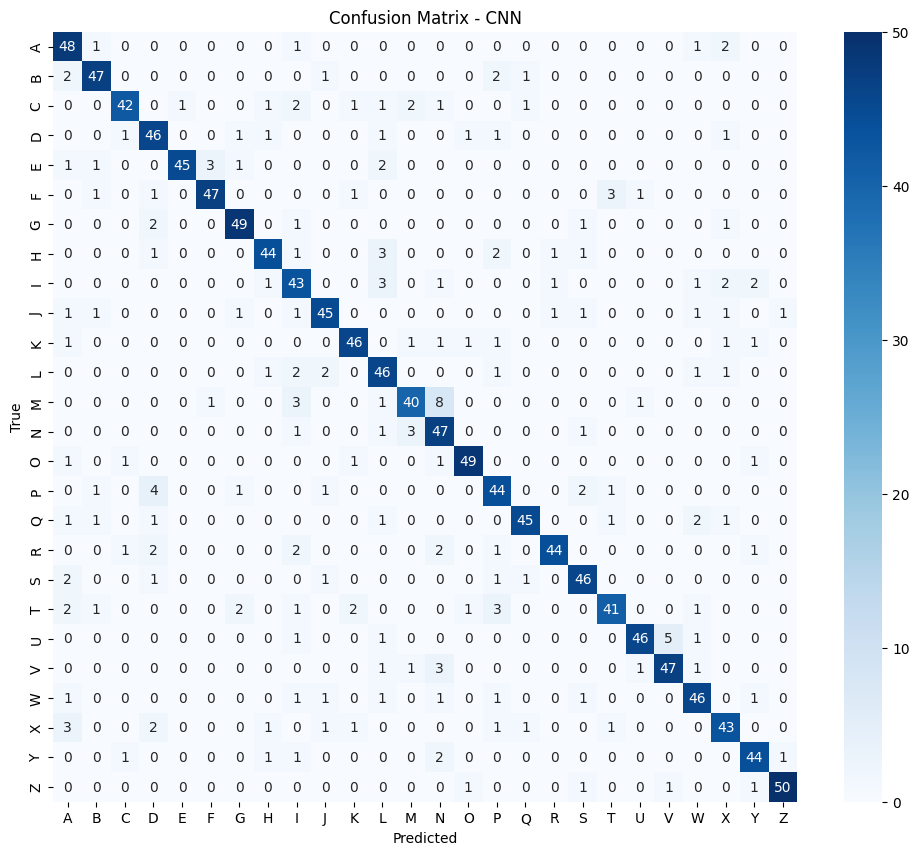

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues",
    annot=True
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.show()


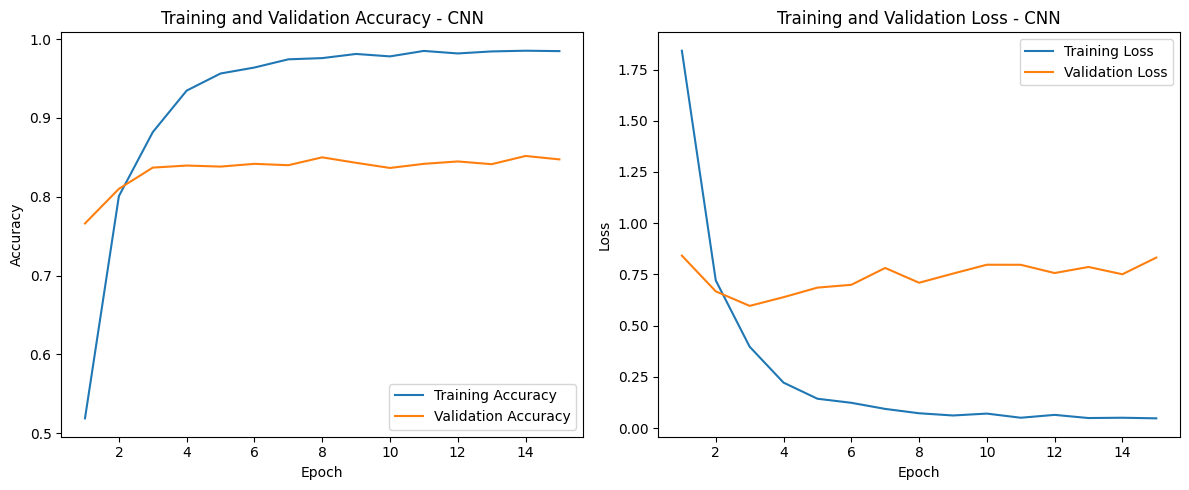

In [11]:
import matplotlib.pyplot as plt

# Ambil data dari history
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Grafik Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Grafik Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss - CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
cnn_model.save("../modelling/cnn_model.h5")
cnn_model.save("../modelling/cnn_model.keras")